# Polynomials and clustered grids

## p9: polynomial interpolation in equispaced and Chebyshev pts

In [1]:
include("smij-functions.jl");

In [2]:
using LinearAlgebra

N = 16
data = [
    (@. -1 + 2*(0:N)/N, "equispaced points"),
    (@. cospi((0:N)/N), "Chebyshev points"),
]

xx = -1.01:0.005:1.01
results = []
for (i,(x,label)) in enumerate(data)
    u = @. 1 / (1 + 16 * x^2)
    uu = @. 1 / (1 + 16 * xx^2)
    p = polyinterp(x, u)              # interpolation
    pp = p.(xx)                       # evaluation of interpolant
    error = norm(uu - pp, Inf)
    push!(results, (;x,u,pp,error,label))
end

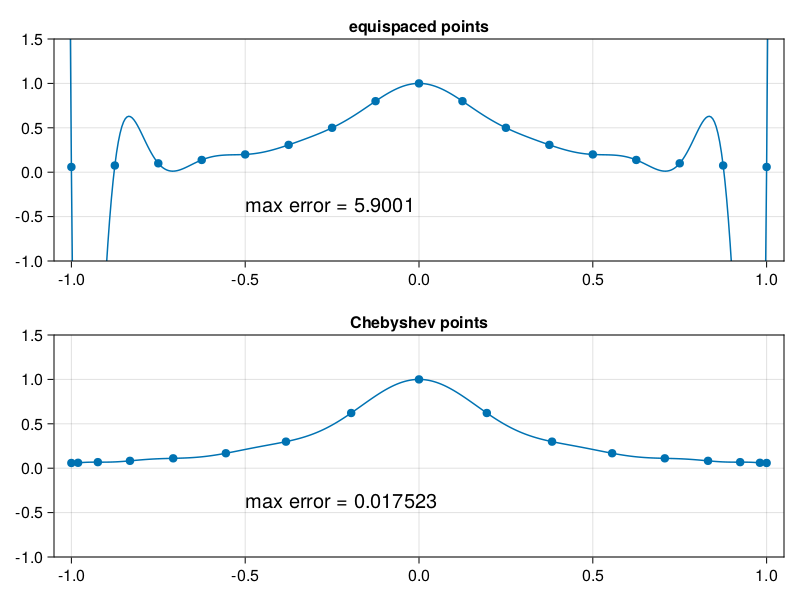

In [3]:
using CairoMakie, PyFormattedStrings

fig = Figure()
for (i,r) in enumerate(results)
    ax = Axis(fig[i, 1], title=r.label)
    lines!(xx, r.pp)
    scatter!(r.x, r.u)
    limits!(-1.05, 1.05, -1, 1.5)
    text!(-0.5, -0.5, text=f"max error = {r.error:.5g}")
end
fig

## p10: polynomials and corresponding equipotential curves

In [4]:
using Polynomials

N = 16
data = [
    (@. -1 + 2*(0:N)/N, "equispaced points"),
    (@. cospi((0:N)/N), "Chebyshev points"),
]

xx = -1:0.005:1
xc = -1.4:0.02:1.4
yc = -1.12:0.02:1.12
results = []
for (i,(x,label)) in enumerate(data)
    p = fromroots(x)
    pp = p.(xx)
    pz = [p(x + 1im*y) for x in xc, y in yc]
    push!(results, (;x,pp,pz,label))
end

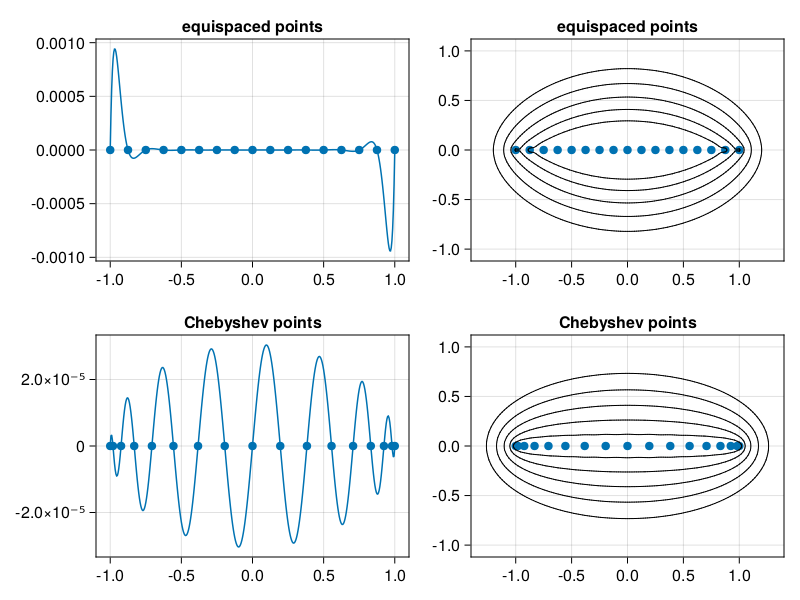

In [5]:
fig = Figure()
levels = 10.0 .^ (-4:0)
for (i,r) in enumerate(results)
    Axis(fig[i, 1], xticks=-1:0.5:1, title=r.label)
    scatter!(r.x, zero(r.x))
    lines!(xx, r.pp)
    
    Axis(fig[i, 2], xticks=-1:0.5:1, title=r.label)
    scatter!(r.x, zero(r.x))
    contour!(xc, yc, abs.(r.pz); levels, color=:black)
    limits!(-1.4, 1.4, -1.12, 1.12)
end
fig